## Purpose
Predicting customer car category preference using **Random Forest Classification** based on both demographic features of customers (income, gender, region) and technical features of previous purchases (price, brand, engine, transmission)

In [38]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


## Load Dataset

In [ ]:
# Load the cleaned dataset
excel_path = "../Car-Sales-Trend_DS7/data/processed/Car_Sales_Clean.csv"
try:
    # Attempt to load it as an Excel file first
    df = pd.read_excel(excel_path)
except:
    # If it fails, try loading as a CSV (in case of incorrect extension)
    df = pd.read_csv(excel_path)

df.head()

,car_id,purchase_date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no,body_style,phone,dealer_region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Select relevant features and drop missing values

In [40]:
features = ['gender', 'annual_income', 'price', 'body_style', 'company', 'model', 'engine', 'transmission', 'color', 'dealer_region']
df_model = df[features].dropna()

## Encode categorical variables

In [41]:
le_gender = LabelEncoder()
le_body_style = LabelEncoder()
le_region = LabelEncoder()
le_company = LabelEncoder()
le_engine = LabelEncoder()
le_transmission = LabelEncoder()

df_model['gender_encoded'] = le_gender.fit_transform(df_model['gender'])
df_model['body_style_encoded'] = le_body_style.fit_transform(df_model['body_style'])
df_model['region_encoded'] = le_region.fit_transform(df_model['dealer_region'])
df_model['company_encoded'] = le_company.fit_transform(df_model['company'])
df_model['engine_encoded'] = le_engine.fit_transform(df_model['engine'])
df_model['transmission_encoded'] = le_transmission.fit_transform(df_model['transmission'])

## Define features (X) and target (y)

In [42]:
X = df_model[['gender_encoded', 'annual_income', 'price', 
              'region_encoded', 'company_encoded', 
              'engine_encoded', 'transmission_encoded']]
y = df_model['body_style_encoded']

## Train-Test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [44]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

Classification Report:

              precision    recall  f1-score   support

     Hardtop       0.49      0.49      0.49       572
   Hatchback       0.69      0.70      0.70      1200
   Passenger       0.83      0.80      0.82       804
         SUV       0.71      0.71      0.71      1304
       Sedan       0.75      0.76      0.75       902

    accuracy                           0.71      4782
   macro avg       0.69      0.69      0.69      4782
weighted avg       0.71      0.71      0.71      4782

Model Accuracy: 0.71


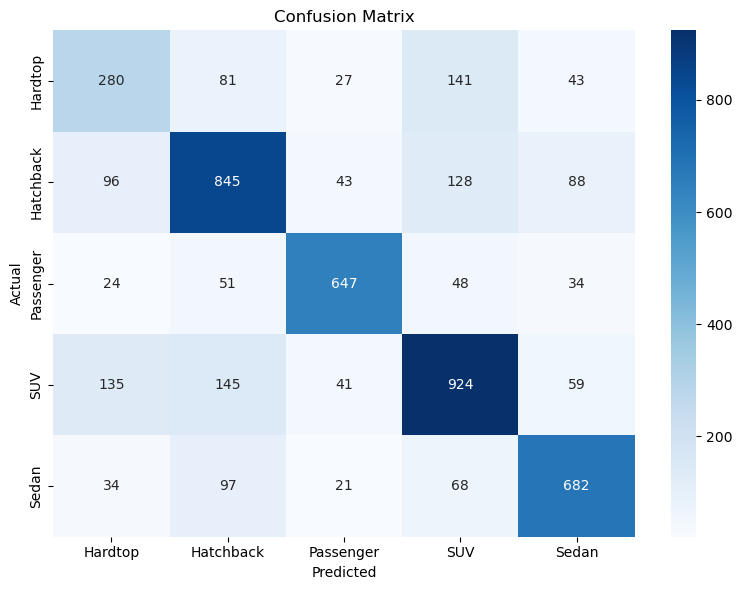

In [45]:
# Predict on test data
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_body_style.classes_))
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_body_style.classes_,
            yticklabels=le_body_style.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Conclusion
### Best Predicted Category: Passenger
Precision: 0.80

Recall: 0.83

F1 Score: 0.82
        Meaning: The model correctly identified 80% of actual Passenger buyers and did so with reasonable precision. This category had the highest performance.

### Weakest Predicted Category: Hardtop
Precision: 0.49 (not very precise)

Recall: 0.49 (low)

F1 Score: 0.49
     Meaning: Even when the model predicts "Hardtop," the actual purchase is of another categories - it rarely identifies correctly the true "Hardtop" buyers. 

### Other Classes:
Sedan, SUV, and Hatchback had relatively good and close results to one another (F1 around 0.70–0.75)

### Overall Performance:
Accuracy: 71%

Macro F1 Score: 0.69

Weighted F1 Score: 0.71

Conclusion: The model performs better than random guessing, and could be considered for deployment if there is no existing model with the same purpose and better peformance. 